# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
df_study = pd.merge(mouse_metadata, study_results, on = "Mouse ID")

# Display the data table for preview
df_study.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
df_study.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1893 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Drug Regimen        1893 non-null   object 
 2   Sex                 1893 non-null   object 
 3   Age_months          1893 non-null   int64  
 4   Weight (g)          1893 non-null   int64  
 5   Timepoint           1893 non-null   int64  
 6   Tumor Volume (mm3)  1893 non-null   float64
 7   Metastatic Sites    1893 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 118.4+ KB


In [3]:
# Checking the number of mice.
df_study["Mouse ID"].nunique()

249

In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
# Thanks ChatGPT for finding a way to show single row of the Duplicate in a single line of code
df_study[df_study.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)].groupby('Mouse ID').size().reset_index(name='Mouse_Duplicate').query('Mouse_Duplicate > 0')

,Mouse ID,Mouse_Duplicate
0,g989,10


In [5]:
# Optional: Get all the data for the duplicate mouse ID.
mask = df_study["Mouse ID"] == "g989"
df_study.loc[mask]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mask = df_study["Mouse ID"] != "g989"
df_study2 = df_study.loc[mask].reset_index(drop=True)
df_study2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1880 entries, 0 to 1879
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1880 non-null   object 
 1   Drug Regimen        1880 non-null   object 
 2   Sex                 1880 non-null   object 
 3   Age_months          1880 non-null   int64  
 4   Weight (g)          1880 non-null   int64  
 5   Timepoint           1880 non-null   int64  
 6   Tumor Volume (mm3)  1880 non-null   float64
 7   Metastatic Sites    1880 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 117.6+ KB


In [7]:
# Checking the number of mice in the clean DataFrame.
df_study2["Mouse ID"].nunique()

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.
mean_tumor = df_study2.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
med_tumor = df_study2.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
var_tumor = df_study2.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
std_tumor = df_study2.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()

type_summary = pd.DataFrame({
    "Mean Tumor Volume": mean_tumor,
    "Median Tumor Volume": med_tumor,
    "Variance": var_tumor,
    "Standard Deviation": std_tumor,
})
type_summary

,Mean Tumor Volume,Median Tumor Volume,Variance,Standard Deviation
Drug Regimen,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774
Ceftamin,52.591172,51.776157,39.290177,6.268188
Infubinol,52.884795,51.820584,43.128684,6.567243
Ketapril,55.235638,53.698743,68.553577,8.279709
Naftisol,54.331565,52.509285,66.173479,8.134708
Placebo,54.033581,52.288934,61.168083,7.821003
Propriva,52.320930,50.446266,43.852013,6.622085
Ramicane,40.216745,40.673236,23.486704,4.846308
Stelasyn,54.233149,52.431737,59.450562,7.710419


In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
df_study2.groupby("Drug Regimen").agg({"Tumor Volume (mm3)" : ["mean", "median", "var", "std", "sem"]})

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<Axes: title={'center': 'Drug Regimen Used'}, xlabel='Drug Regimen', ylabel='Count'>

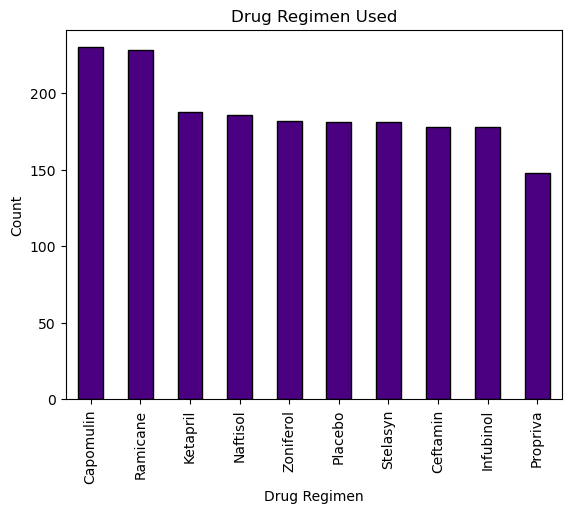

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
df_study2.groupby("Drug Regimen").size().sort_values(ascending = False).plot(kind="bar", title = "Drug Regimen Used", ylabel = "Count", edgecolor = "black",  color = 'indigo')

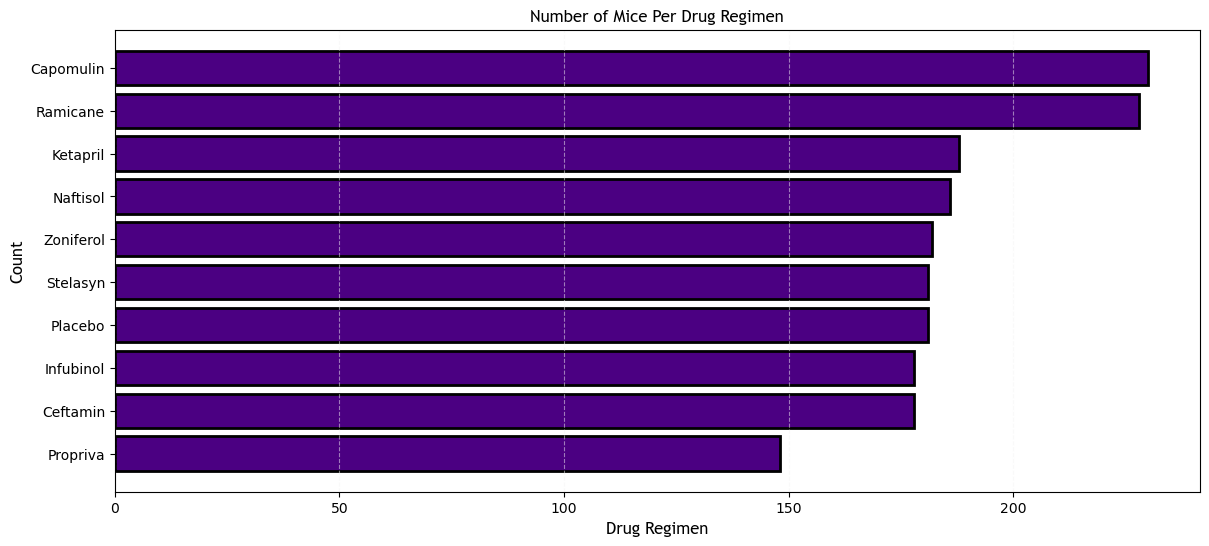

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

# Create Bar Plot
plot_data = df_study2.groupby("Drug Regimen").size().sort_values(ascending = True)
plt.figure(figsize=(14,6))
plt.barh(plot_data.index, plot_data.values, edgecolor = "black", color = "indigo", linewidth = 2)

#Customizations
plt.xlabel("Drug Regimen", fontfamily = "Trebuchet MS", fontsize = 12)
plt.ylabel("Count", fontfamily = "Trebuchet MS", fontsize = 12)
plt.title("Number of Mice Per Drug Regimen", fontfamily = "Trebuchet MS", fontsize = 12)
plt.grid(axis="x", color="whitesmoke", alpha = 0.50, linestyle = "--")

<Axes: title={'center': 'Gender of Mice'}, ylabel='count'>

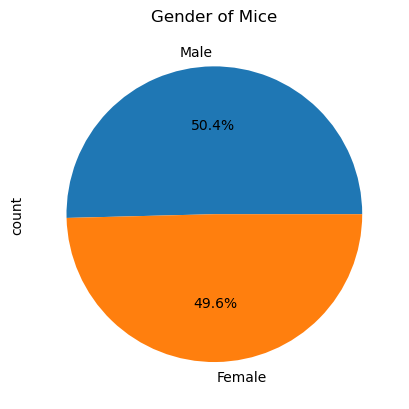

In [12]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
clean_gender = df_study2[["Mouse ID", "Sex"]].drop_duplicates()
# Get the unique mice with their gender
gender_data = clean_gender.Sex.value_counts()

# Make the pie chart
gender_data.plot(autopct="%1.1f%%", kind="pie", title="Gender of Mice")

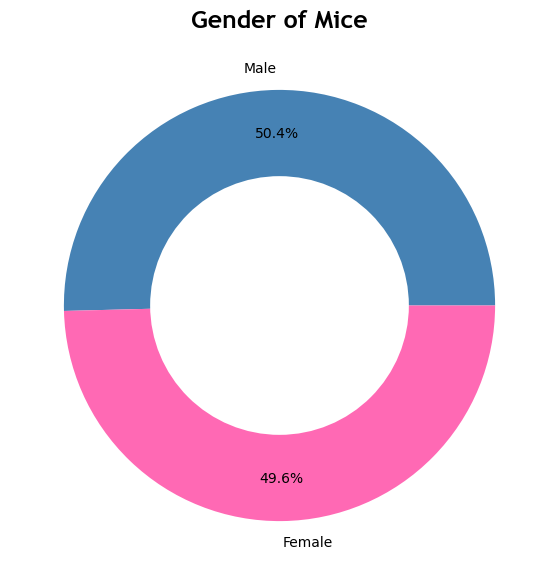

In [13]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
gender_data = clean_gender.Sex.value_counts()
# Thanks ChatGPT for alternative way to put in colors
colors = ["steelblue", "hotpink"]
plt.figure(figsize=(7,7))
plt.pie(gender_data.values, labels=gender_data.index, colors=colors, autopct="%1.1f%%", pctdistance = 0.80)
#Customization


plt.title("Gender of Mice", fontweight = "bold", fontsize = 18, fontfamily = "Trebuchet MS")
# Make a Donut
donut = plt.Circle((0,0), 0.60, fc = "white")
plt.gca().add_artist(donut)

# Show Chart
plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint = df_study2.groupby("Mouse ID").Timepoint.max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
df_study3 = pd.merge(max_timepoint, df_study2, on=["Mouse ID", "Timepoint"], how="left")

drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
mask = df_study3["Drug Regimen"].isin(drugs)
df_study3 = df_study3.loc[mask].reset_index(drop=True)

In [15]:
#Used Alexander's ChatGPT request from November 18th post class recording
# Put treatments into a list for for loop (and later for plot labels)
treatments = df_study3["Drug Regimen"].unique()

# Create empty list to fill with tumor vol data (for plotting)
tumor_volumes = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for treatment in treatments:

    # Locate the rows which contain mice on each drug and get the tumor volumes
    treatment_data = df_study3.loc[df_study3["Drug Regimen"] == treatment]["Tumor Volume (mm3)"]

    # add subset
    tumor_volumes.append(treatment_data)

    # IQR outlier detection
    q1 = np.percentile(treatment_data, 25)
    q3 = np.percentile(treatment_data, 75)
    iqr = q3 - q1

    # Determine outliers using upper and lower bounds
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)

    # ID Outliers
    outliers = treatment_data[(treatment_data < lower_bound) | (treatment_data > upper_bound)]
    print(f"Outliers for {treatment}: {outliers.tolist()}")


Outliers for Infubinol: [36.3213458]
Outliers for Ceftamin: []
Outliers for Ramicane: []
Outliers for Capomulin: []


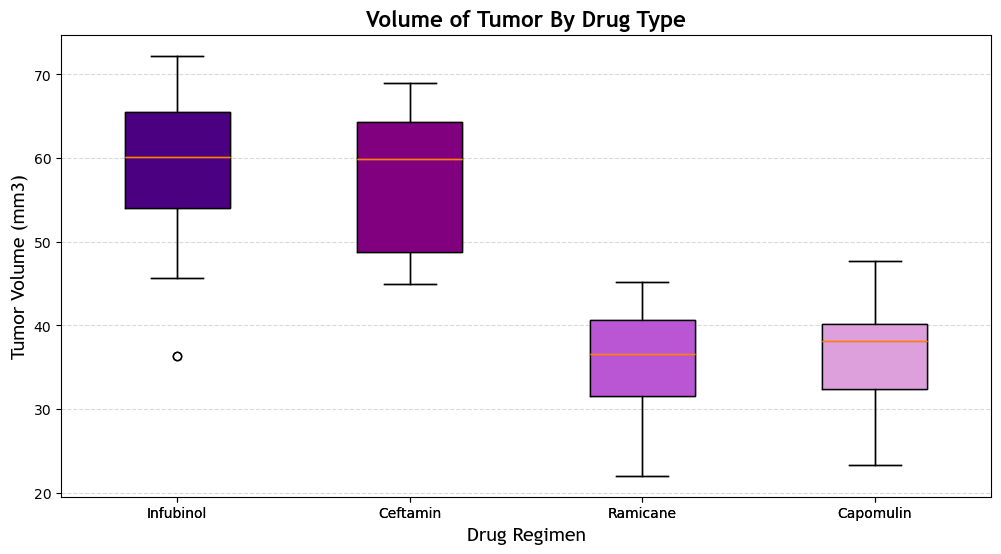

In [16]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
plt.figure(figsize = (12, 6))

plt.boxplot(tumor_volumes, tick_labels = treatments)

# Add labels/titles
plt.xlabel("Drug Regimen", fontfamily = "Trebuchet MS", fontsize = 14)
plt.ylabel("Tumor Volume (mm3)", fontfamily = "Trebuchet MS", fontsize = 14)
plt.title("Volume of Tumor By Drug Type", fontweight = "bold", fontfamily = "Trebuchet MS", fontsize = 16)
# Customization
plt.grid(axis="y", linestyle="--", color="silver", alpha=.60)
#Thanks ChatGPT for helping figure out multiple colors with boxplots
box = plt.boxplot(tumor_volumes, tick_labels = treatments, patch_artist=True)
colors = ['indigo', 'purple', 'mediumorchid', 'plum']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

plt.show()

## Line and Scatter Plots

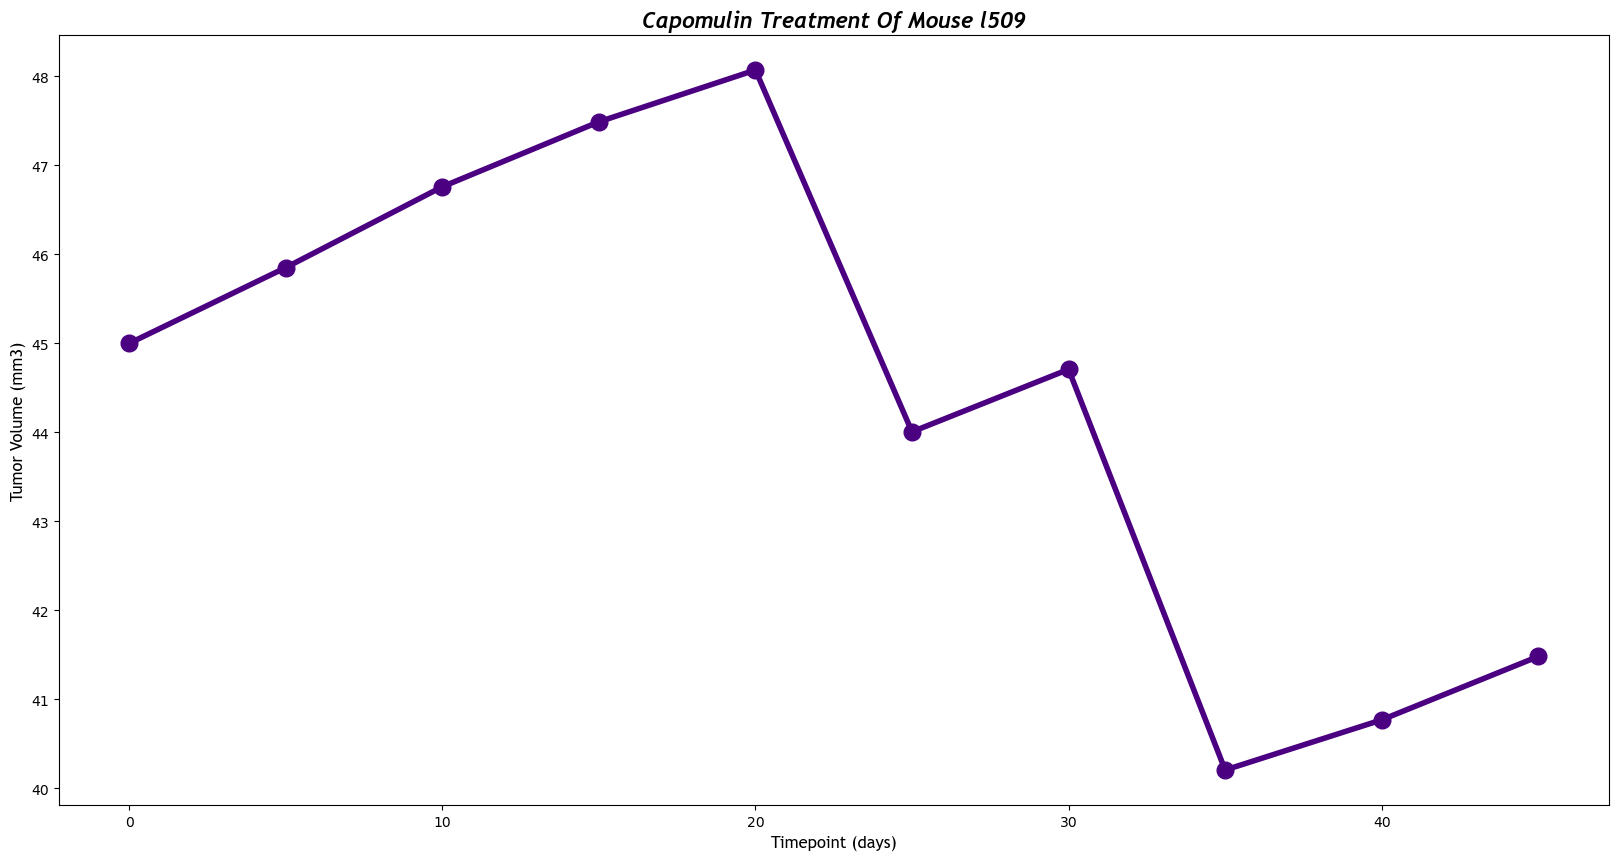

In [17]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# Change Canvas Size
mouse = "l509" # mouse code already shown in starter code
df_study4 = df_study2.loc[df_study2["Mouse ID"] == mouse]

# Change Canvas Size
plt.figure(figsize=(20, 10))

# Create a basic plot
plt.plot(df_study4.Timepoint, df_study4["Tumor Volume (mm3)"], color="Indigo", marker="o", linewidth=4, markersize=12)

# Customizations

# Change colors
# Add in reference lines
# Add Labels/Title
plt.xlabel("Timepoint (days)", fontfamily="Trebuchet MS", fontsize=12)
plt.ylabel("Tumor Volume (mm3)", fontfamily="Trebuchet MS", fontsize=12)
plt.title("Capomulin Treatment Of Mouse l509", fontweight="bold", fontsize=16, fontfamily="Trebuchet MS", fontstyle="italic")



# Show/Save the Graph
plt.show()

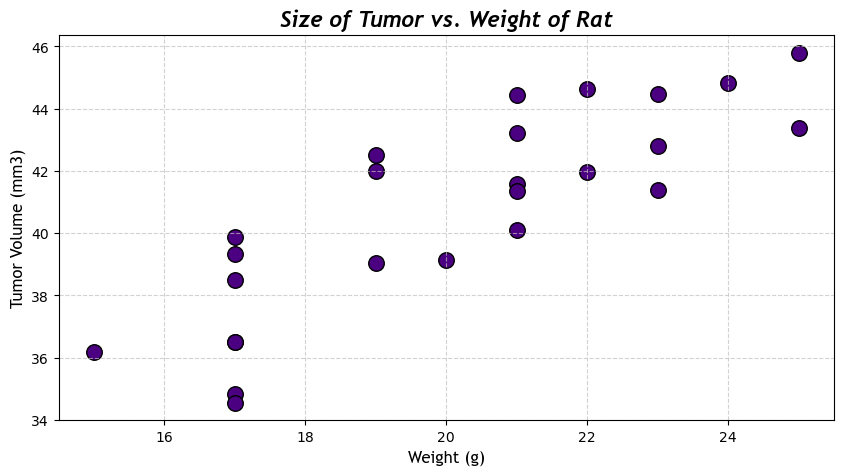

In [18]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
drug_regimen = "Capomulin"

df_study5 = df_study2.loc[df_study2["Drug Regimen"] == drug_regimen]
df_study6 = df_study5.groupby("Mouse ID").agg({"Tumor Volume (mm3)": "mean", "Weight (g)": "mean"}).reset_index()

# Change Canvas Size
plt.figure(figsize=(10, 5))

# Create a basic plot
plt.scatter(df_study6["Weight (g)"], df_study6["Tumor Volume (mm3)"], color="Indigo", edgecolor = "black", s = 125)

# Customizations

# Change colors
# Add in reference lines
# Add Labels/Title
plt.xlabel("Weight (g)", fontfamily="Trebuchet MS", fontsize=12)
plt.ylabel("Tumor Volume (mm3)", fontfamily="Trebuchet MS", fontsize=12)
plt.title("Size of Tumor vs. Weight of Rat", fontweight="bold", fontsize=16, fontfamily="Trebuchet MS", fontstyle="italic")
plt.grid(linestyle = "--", color = "silver", alpha = 0.70)

# Show/Save the Graph
plt.show()

## Correlation and Regression

In [19]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
x_values = df_study6["Weight (g)"]
y_values = df_study6["Tumor Volume (mm3)"]

# Regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)

y = 0.95x + 21.55


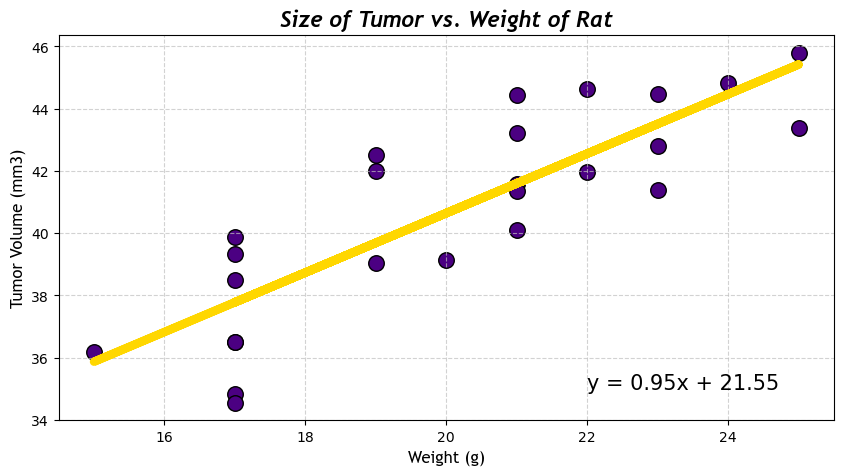

In [20]:
# Remake plot with Regression
# Change Canvas Size
plt.figure(figsize=(10, 5))

# Create a basic plot
plt.scatter(df_study6["Weight (g)"], df_study6["Tumor Volume (mm3)"], color="Indigo", edgecolor = "black", s = 125)
plt.plot(df_study6["Weight (g)"], regress_values, color = "gold", linewidth = 6)

# Customizations

# Change colors
# Add in reference lines
# Add Labels/Title
plt.xlabel("Weight (g)", fontfamily="Trebuchet MS", fontsize=12)
plt.ylabel("Tumor Volume (mm3)", fontfamily="Trebuchet MS", fontsize=12)
plt.title("Size of Tumor vs. Weight of Rat", fontweight="bold", fontsize=16, fontfamily="Trebuchet MS", fontstyle="italic")
plt.grid(linestyle = "--", color = "silver", alpha = 0.70)

plt.annotate(line_eq, (22,35), fontsize = 15, color = "black")

# Show/Save the Graph
plt.show()